<a href="https://colab.research.google.com/github/Elixirman/Blackbox/blob/main/British_Airways_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Data Preprocessing







## Importing Libraries & Dataset


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

b_data = pd.read_csv("/content/customer_booking.csv", encoding='ISO-8859-1')


## Data Exploration

In [ ]:
b_data.head(-5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49990,1,Internet,RoundTrip,12,6,10,Sat,PERPNH,Australia,0,0,0,5.62,0
49991,1,Internet,RoundTrip,8,6,6,Mon,PERPNH,Australia,0,1,0,5.62,0
49992,1,Internet,RoundTrip,14,6,12,Fri,PERPNH,Australia,1,0,0,5.62,0
49993,1,Internet,RoundTrip,19,6,12,Sun,PERPNH,Australia,1,0,0,5.62,0


In [ ]:
b_data.shape

(50000, 14)

In [ ]:
b_data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [ ]:
b_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
"""
To provide more context, below is a more detailed data description, explaining exactly what each column means:

num_passengers = number of passengers travelling
sales_channel = sales channel booking was made on
trip_type = trip Type (Round Trip, One Way, Circle Trip)
purchase_lead = number of days between travel date and booking date
length_of_stay = number of days spent at destination
flight_hour = hour of flight departure
flight_day = day of week of flight departure
route = origin -> destination flight route
booking_origin = country from where booking was made
wants_extra_baggage = if the customer wanted extra baggage in the booking
wants_preferred_seat = if the customer wanted a preferred seat in the booking
wants_in_flight_meals = if the customer wanted in-flight meals in the booking
flight_duration = total duration of flight (in hours)
booking_complete = flag indicating if the customer completed the booking
Before we compute any statistics on the data, lets do any necessary data conversion

"""

## Dealing With Missing Values ( NaN & null)

In [ ]:
b_data.isnull().values.any(), b_data.isnull().values.sum()

(False, 0)

##  Statistical Summary


In [ ]:
b_data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


##Encoding The Categorical Data (One Hot Encoding)

In [ ]:
# Check columns with categorical data

b_data.select_dtypes(include= "object").columns

Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')

In [ ]:
# Checking The Unique Variables in the Categorical Column

b_data["sales_channel"].unique()

array(['Internet', 'Mobile'], dtype=object)

In [ ]:
b_data["trip_type"].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [ ]:
b_data["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
b_data["route"].unique(), b_data["route"].nunique()

(array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
        'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
        'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
        'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
        'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
        'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
        'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
        'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
        'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
        'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
        'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
        'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
        'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
        'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
        'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 

In [ ]:
b_data["booking_origin"].unique(), b_data["booking_origin"].nunique()

(array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
        'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
        'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
        'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
        'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
        'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
        'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
        'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
        'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
        'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
        'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
        'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
        'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
        'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
   

## Column Dropping

In [ ]:
# Droping Columns' "booking_origin", "route" "num_passengers", "sales_channel", " "

In [ ]:
b_data_1 = b_data.drop (columns= ["booking_origin", "route", "num_passengers", "wants_in_flight_meals", "wants_preferred_seat"])

In [ ]:
# Preview Data Head-tail

b_data_1

,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,flight_duration,booking_complete
0,Internet,RoundTrip,262,19,7,Sat,1,5.52,0
1,Internet,RoundTrip,112,20,3,Sat,0,5.52,0
2,Internet,RoundTrip,243,22,17,Wed,1,5.52,0
3,Internet,RoundTrip,96,31,4,Sat,0,5.52,0
4,Internet,RoundTrip,68,22,15,Wed,1,5.52,0
...,...,...,...,...,...,...,...,...,...
49995,Internet,RoundTrip,27,6,9,Sat,1,5.62,0
49996,Internet,RoundTrip,111,6,4,Sun,0,5.62,0
49997,Internet,RoundTrip,24,6,22,Sat,0,5.62,0
49998,Internet,RoundTrip,15,6,11,Mon,1,5.62,0


## OHE

In [ ]:
# Now Encode the Categorical values

b_data_ohe = pd.get_dummies(data= b_data_1, drop_first= True)

In [ ]:
# Preview Data Head-tail

b_data_ohe

,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
0,262,19,7,1,5.52,0,0,0,1,0,1,0,0,0,0
1,112,20,3,0,5.52,0,0,0,1,0,1,0,0,0,0
2,243,22,17,1,5.52,0,0,0,1,0,0,0,0,0,1
3,96,31,4,0,5.52,0,0,0,1,0,1,0,0,0,0
4,68,22,15,1,5.52,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,27,6,9,1,5.62,0,0,0,1,0,1,0,0,0,0
49996,111,6,4,0,5.62,0,0,0,1,0,0,1,0,0,0
49997,24,6,22,0,5.62,0,0,0,1,0,1,0,0,0,0
49998,15,6,11,1,5.62,0,0,0,1,1,0,0,0,0,0


## Countplot

<Axes: xlabel='booking_complete', ylabel='count'>

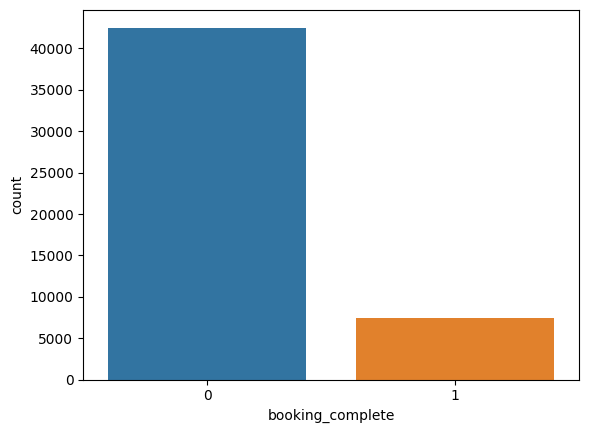

In [ ]:
sns.countplot(x="booking_complete", data= b_data_ohe)

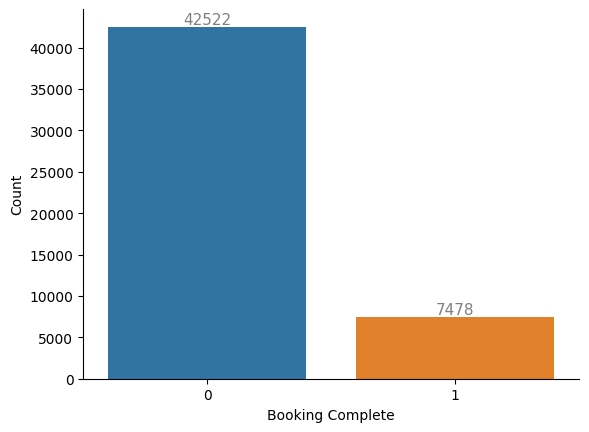

In [ ]:



# Create count plot
ax = sns.countplot(x="booking_complete", data=b_data_ohe)

# Add counts to bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                textcoords='offset points')

# Show plot
sns.despine()
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.2)
ax.set_xlabel('Booking Complete')
ax.set_ylabel('Count')
plt.show()


## Correlation Matrix & Heatmap

In [ ]:
# Define Dataset with Independent variables only
"""
to do this we drop the target variable "booking_complete"

"""

b_data_2 = b_data_ohe.drop (columns= ["booking_complete"])

<Axes: title={'center': 'Independent Variables Correlation with Target (Dependent Variable) -booking_complete'}>

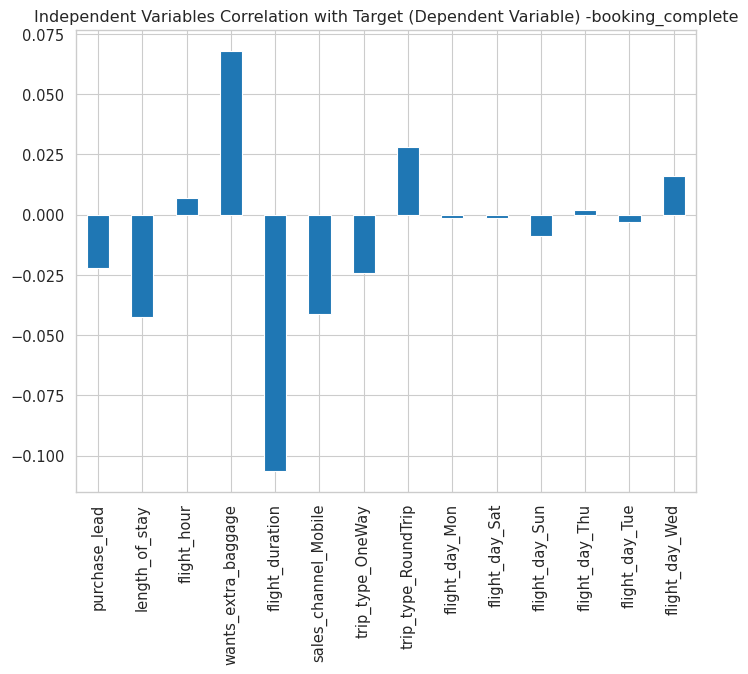

In [ ]:

b_data_2.corrwith(b_data_ohe["booking_complete"]).plot.bar(
    figsize= (8, 6), title= "Independent Variables Correlation with Target (Dependent Variable) -booking_complete", grid= True)


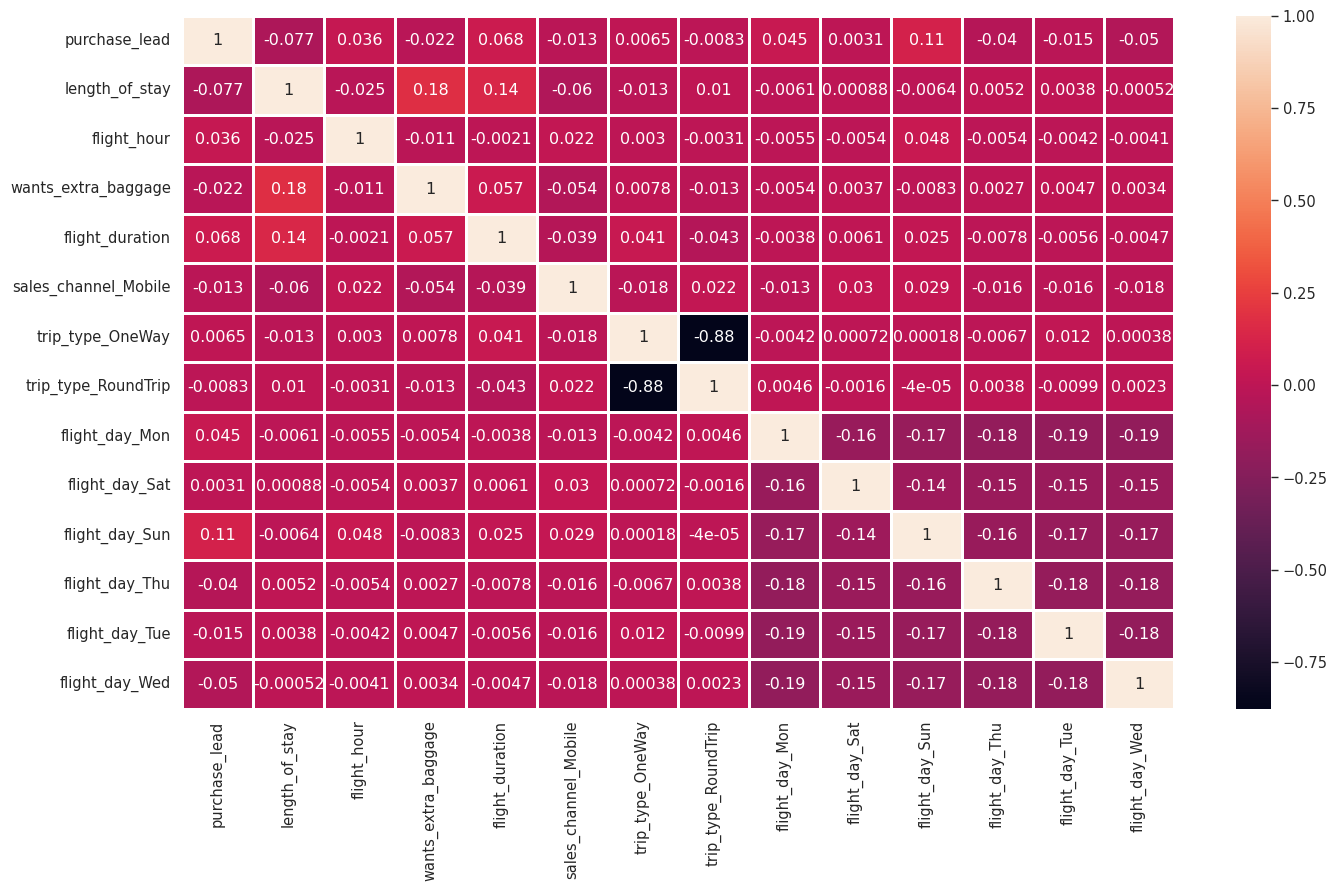

In [ ]:
# Heatmap Creation
plt.figure(figsize= (16,9))
ax = sns.heatmap(b_data_2.corr(), annot= True, linewidths= 2, )

## Dataset Splitting

In [ ]:
# Define the Independent Variables / Matrix of Features

x = b_data_2

In [ ]:
# Dependent / Target Variables

y = b_data_ohe["booking_complete"]

## Library Importation

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size= 0.2, random_state= 0)

In [ ]:
c = x_train.shape
d = x_test.shape
e = y_train.shape
f = y_test.shape

print("c: {} \nd: {} \ne: {} \nf: {} ".format(c, d, e, f))


c: (40000, 14) 
d: (10000, 14) 
e: (40000,) 
f: (10000,) 


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Create an instance
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Preview

x_test

array([[-0.57417355, -0.09053106, -0.01663601, ..., -0.41806402,
         2.34517324, -0.42427658],
       [ 0.33202468,  3.35961935,  0.53758983, ..., -0.41806402,
        -0.42640773, -0.42427658],
       [-0.78414631, -0.50336957, -0.94034575, ...,  2.39197814,
        -0.42640773, -0.42427658],
       ...,
       [ 0.09994952, -0.50336957,  0.16810593, ...,  2.39197814,
        -0.42640773, -0.42427658],
       [-0.25368881, -0.53285804,  0.16810593, ..., -0.41806402,
         2.34517324, -0.42427658],
       [-0.26474001,  2.41598847, -0.94034575, ...,  2.39197814,
        -0.42640773, -0.42427658]])

In [ ]:
x_train

array([[-0.73994152, -0.0610426 ,  0.90707372, ..., -0.41806402,
         2.34517324, -0.42427658],
       [-0.68468553,  0.5287267 , -0.7556038 , ..., -0.41806402,
        -0.42640773, -0.42427658],
       [-0.43050798, -0.50336957,  1.46129956, ..., -0.41806402,
        -0.42640773, -0.42427658],
       ...,
       [ 0.33202468, -0.50336957, -0.20137796, ..., -0.41806402,
        -0.42640773, -0.42427658],
       [-0.78414631, -0.50336957, -0.01663601, ..., -0.41806402,
        -0.42640773, -0.42427658],
       [ 2.8295954 ,  1.82621917,  1.83078345, ..., -0.41806402,
        -0.42640773, -0.42427658]])

# Part 2: Model Building

## Model-: Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create an instance
classifier_rf = RandomForestClassifier(random_state= 0)

# Train the model
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# Prediction
y_pred = classifier_rf.predict(x_test)

## Model Evaluation

In [ ]:
# Evaluate the performance

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, r2_score, recall_score, precision_score

In [ ]:


# Applied Metrics

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)

print("acc: {} \nf1: {}  \nr2: {} \nrs: {} \nps: {}".format( acc*100, f1*100, r2*100, rs*100, ps*100))


acc: 84.27 
f1: 16.017084890549917  
r2: -22.499860016847826 
rs: 9.91407799074686 
ps: 41.66666666666667


[[8277  210]
 [1363  150]]


Text(0.5, 20.71666666666666, 'Predicted label')

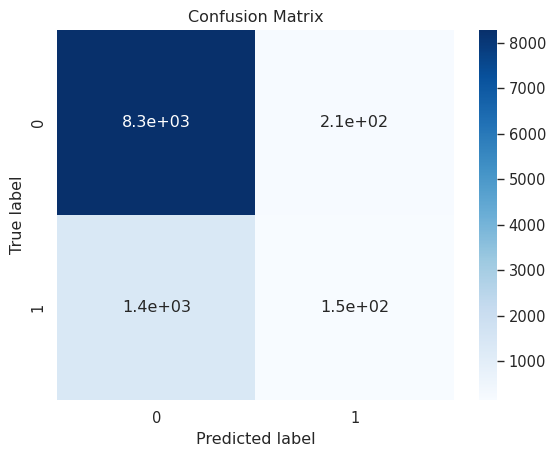

In [ ]:
# Confusion Matrix

conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

# Confusion Matrix Visual

import seaborn as sns
from sklearn.metrics import confusion_matrix

# create the confusion matrix
conf_m = confusion_matrix(y_test, y_pred)

# plot the matrix
sns.heatmap(conf_m, annot=True, cmap='Blues')

# add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



# Create a linear regression model
classifier_rf

# Define the number of folds
k = 2

# Define the cross-validation method
cv = KFold(n_splits=k, shuffle=True, random_state=1)

# Evaluate the model using cross-validation
scores = cross_val_score(classifier_rf, x, y, scoring='neg_mean_squared_error', cv=cv)

# Print the mean and standard deviation of the cross-validation scores
print('Cross-validation scores:', scores)
print('Mean:', np.mean(scores))
print('Standard deviation:', np.std(scores))


Cross-validation scores: [-0.15776 -0.1588 ]
Mean: -0.15828
Standard deviation: 0.0005199999999999927


# Part 3: Parameter Tunning

In [ ]:
# Import Library
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
# Create an instance

random_cv = RandomizedSearchCV(estimator= classifier_rf, param_distributions= parameters, n_iter= 5, scoring="roc_auc", n_jobs= -1, cv= 5, verbose= 3)

In [ ]:
# Train the Model
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='roc_auc', verbose=3)

In [ ]:
# Checking
random_cv.best_estimator_

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, random_state=0)

In [ ]:
random_cv.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 10}

In [ ]:
random_cv.best_score_

0.6765670810495237

# Part 4: Final Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Create an instance and apply "best_estimator_"
classifier = RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, random_state=0)


In [ ]:
# Train the model
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, random_state=0)

In [ ]:
# Prediction
y_pred = classifier.predict(x_test)


## Model Evaluation

In [ ]:
# Applied Metrics

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)

print("acc: {} \nf1: {}  \nr2: {} \nrs: {} \nps: {}".format( acc*100, f1*100, r2*100, rs*100, ps*100))


acc: 84.88 
f1: 0.1321003963011889  
r2: -17.749388649379494 
rs: 0.06609385327164573 
ps: 100.0
